In [28]:
!pip install sastrawi
import pandas as pd
import matplotlib.pyplot as plt
import Sastrawi
from wordcloud import WordCloud
import numpy as np

## A. Loading Data

In [29]:
from google.colab import drive
drive.mount('/content/drive')
df1 = pd.read_csv('/content/drive/MyDrive/Dataset/skakmat_anis_2.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Dataset/skakmat_anis1.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Dataset/skakmat_rk.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Dataset/skakmat_fahrihamzah.csv')
df5 = pd.read_csv('/content/drive/MyDrive/Dataset/skakmat_ferdinuril.csv')
df6 = pd.read_csv('/content/drive/MyDrive/Dataset/skakmat_ahmaadsahroni.csv')
df7 = pd.read_csv('/content/drive/MyDrive/Dataset/skakmat_saraswati.csv')
df8 = pd.read_csv('/content/drive/MyDrive/Dataset/skakmat_harizashar.csv')
df9 = pd.read_csv('/content/drive/MyDrive/Dataset/skakmat_dedekuki.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Menggabungkan semua DataFrame
df_copy = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9], ignore_index=True)

# Menampilkan informasi dari DataFrame gabungan

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   author        901 non-null    object 
 1   published_at  900 non-null    object 
 2   updated_at    900 non-null    object 
 3   like_count    900 non-null    float64
 4   text          900 non-null    object 
dtypes: float64(1), object(4)
memory usage: 35.3+ KB


In [31]:
df_copy['text'] = df_copy['text'].astype(str)

## B. Cleansing Data

In [32]:
df_copy.shape

(901, 5)

In [33]:
df_copy = df_copy.drop_duplicates(subset=['text'])

In [34]:
df_copy.duplicated().sum()

0

In [35]:
df_copy.isnull().sum()

,0
author,0
published_at,1
updated_at,1
like_count,1
text,0


In [36]:
df_copy = df_copy.dropna()

In [37]:
# gunakan df yang berisi Text saja
df_copy = df_copy[['text']]
df_copy.head()

,text
0,obrolon org intelektual. gibran mana bisa kek ...
1,di konten ini Aku jatuh cinta sama Musiknya. s...
2,Stand with anies baswedan
3,"BTW fun fact-nya, ada lho kerabat Anies Baswed..."
4,umur saya baru 18 tahun ketika melihat video i...


## C. Preprocessing Teks

In [38]:
import re
import string

def clean_yt_text(text):
    # Hapus mention, hashtag
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # Hapus mention
    text = re.sub(r'#\w+', '', text)            # Hapus hashtag
    # Hapus URL
    text = re.sub(r'https?://\S+', '', text)    # Hapus URL
    text = re.sub(r'http://', ' ', text)        # Hapus incomplete URL
    text = re.sub(r'https://', ' ', text)       # Hapus incomplete URL

    # Hapus karakter non-alphanumeric dan emoji
    text = re.sub(r'[^A-Za-z0-9 ]+', '', text)  # Hapus karakter non-alphanumeric
    text = re.sub(r'([x#][A-Za-z0-9]+)', ' ', text)  # Hapus emoji

    # Hapus karakter tunggal
    text = re.sub(r'\b[a-zA-Z]\b', '', text)

    # Ganti tanda strip dengan spasi
    text = text.replace('-', ' ')

    # Hapus angka
    text = re.sub(r'\d+', '', text)

    # Hapus tab dan karakter whitespace berlebih
    text = text.replace('\\t', ' ').replace('\\n', ' ').replace('\\u', ' ').replace('\\', '')
    text = re.sub(r'\s+', ' ', text).strip()  # Hapus spasi berlebih

    # Hapus titik berlebih
    text = text.replace('..', ' ')

    # Ubah ke huruf kecil
    text = text.lower()

    # Hapus tanda baca kecuali underscore
    remove = string.punctuation
    remove = remove.replace("_", "")  # Jangan hapus underscore
    pattern = r"[{}]".format(remove)  # Buat pola
    text = re.sub(pattern, "", text)

    return text


df_copy['clean_text'] = df_copy['text'].apply(clean_yt_text)

In [39]:
# Mengubah text menjadi lower
df_copy['clean_text'] = df_copy['clean_text'].str.lower()

In [40]:
df_copy

,text,clean_text
0,obrolon org intelektual. gibran mana bisa kek ...,obrolon org intelektual gibran mana bisa kek gini
1,di konten ini Aku jatuh cinta sama Musiknya. s...,di konten ini aku jatuh cinta sama musiknya se...
2,Stand with anies baswedan,stand with anies baswedan
3,"BTW fun fact-nya, ada lho kerabat Anies Baswed...",btw fun factnya ada lho kerabat anies baswedan...
4,umur saya baru 18 tahun ketika melihat video i...,umur saya baru tahun ketika melihat video ini ...
...,...,...
896,10 menit pertama membuat saya berkata tolol,menit pertama membuat saya berkata tolol
897,Episode ini &quot;Harusnya judulnya Partai Kos...,episode ini quotharusnya judulnya partai koson...
898,"BANG PANDJI, LU SALAH NGUNDANG. INI EPISODE YG...",bang pandji lu salah ngundang ini episode yg s...
899,Halo mas oki...!<br>Saya kepala desa membuat p...,halo mas okibrsaya kepala desa membuat panitia...


### C1. Normalisasi

In [46]:
norm = {" dgn " : " dengan ",
        " gue ": " saya ",
        " dgn ":" dengan ",
        "bgmn ":" bagaimana ",
        ' tdk':' tidak ',
        ' blum ':' belum ',
        'mantaaaaaaaappp':' bagus ',
        ' josss ':' bagus ',
        ' thanks ': ' terima kasih ',
        'fast':' cepat ',
        ' dg ':' dengan ',
        'trims':' terima kasih ',
        'brg':' barang ',
        'gx':' tidak ',
        ' dgn ':' dengan ',
        ' recommended':' rekomen ',
        'recomend':' rekomen ',
        'good':' bagus ',
        " yg ": " yang ",
        " utk ": " untuk ",
        " dlm ": " dalam ",
        " krn ": " karena ",
        " spt ": " seperti ",
        " tdk ": " tidak ",
        " sdh ": " sudah ",
        " sy ": " saya ",
        " blm ": " belum ",
        " ttp ": " tetap ",
        " trs ": " terus ",
        "dpt ": " dapat ",
        " sm ": " sama ",
        " mrk ": " mereka ",
        " dsb ": " dan sebagainya ",
        " sblm ": " sebelum ",
        " sblmnya ": " sebelumnya ",
        " kmrn ": " kemarin ",
        " hrs ": " harus ",
        " dmn ": " dimana ",
        " ap ": " apa ",
        " aj ": " saja ",
        " br ": " baru ",
        " kpd ": " kepada ",
        " skrg ": " sekarang ",
        " ngga ": " tidak ",
        " ga ": " tidak ",
        " gk ": " tidak ",
        " knp ": " kenapa ",
        " jg ": " juga ",
        " bs ": " bisa ",
        " gmn ": " gimana ",
        " lbh ": " lebih ",
        " bgmn ": " bagaimana ",
        " drpd ": " daripada ",
        " cm ": " cuma ",
        " cmn ": " cuma ",
        " km ": " kamu ",
        " lg ": " lagi ",
        " sj ": " saja ",
        " ya ": " iya ",
        " ga ": " tidak ",
        " ngak ": " tidak ",
        " mantab ": " keren ",
        "org":"orang",
        "btw":"omong omong"
}

# def normalisasi(str_text):
#   for i in norm:
#     str_text = str_text.replace(i, norm[i])
#   return str_text

# df_copy['text'] = df_copy['text'].apply(lambda x: normalisasi(x))
def normalisasi(str_text):
    for i in norm:
        str_text = str_text.replace(i, norm[i])
    return str_text

df_copy['normalize_text'] = df_copy['clean_text'].apply(lambda x:normalisasi(x))
df_copy

,text,clean_text,normalize_text
0,obrolon org intelektual. gibran mana bisa kek ...,obrolon org intelektual gibran mana bisa kek gini,obrolon orang intelektual gibran mana bisa kek...
1,di konten ini Aku jatuh cinta sama Musiknya. s...,di konten ini aku jatuh cinta sama musiknya se...,di konten ini aku jatuh cinta sama musiknya se...
2,Stand with anies baswedan,stand with anies baswedan,stand with anies baswedan
3,"BTW fun fact-nya, ada lho kerabat Anies Baswed...",btw fun factnya ada lho kerabat anies baswedan...,omong omong fun factnya ada lho kerabat anies ...
4,umur saya baru 18 tahun ketika melihat video i...,umur saya baru tahun ketika melihat video ini ...,umur saya baru tahun ketika melihat video ini ...
...,...,...,...
896,10 menit pertama membuat saya berkata tolol,menit pertama membuat saya berkata tolol,menit pertama membuat saya berkata tolol
897,Episode ini &quot;Harusnya judulnya Partai Kos...,episode ini quotharusnya judulnya partai koson...,episode ini quotharusnya judulnya partai koson...
898,"BANG PANDJI, LU SALAH NGUNDANG. INI EPISODE YG...",bang pandji lu salah ngundang ini episode yg s...,bang pandji lu salah ngundang ini episode yang...
899,Halo mas oki...!<br>Saya kepala desa membuat p...,halo mas okibrsaya kepala desa membuat panitia...,halo mas okibrsaya kepala desa membuat panitia...


### C2. Stopwords

In [47]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text


df_copy['stopword_text'] = df_copy['normalize_text'].apply(lambda x: stopword(x))
df_copy.head()

,text,clean_text,normalize_text,stopword_text
0,obrolon org intelektual. gibran mana bisa kek ...,obrolon org intelektual gibran mana bisa kek gini,obrolon orang intelektual gibran mana bisa kek...,obrolon orang intelektual gibran mana kek gini
1,di konten ini Aku jatuh cinta sama Musiknya. s...,di konten ini aku jatuh cinta sama musiknya se...,di konten ini aku jatuh cinta sama musiknya se...,konten aku jatuh cinta sama musiknya didengark...
2,Stand with anies baswedan,stand with anies baswedan,stand with anies baswedan,stand with anies baswedan
3,"BTW fun fact-nya, ada lho kerabat Anies Baswed...",btw fun factnya ada lho kerabat anies baswedan...,omong omong fun factnya ada lho kerabat anies ...,omong omong fun factnya lho kerabat anies basw...
4,umur saya baru 18 tahun ketika melihat video i...,umur saya baru tahun ketika melihat video ini ...,umur saya baru tahun ketika melihat video ini ...,umur baru tahun melihat video bagi ini edukasi...


### C3. Tokenize

In [48]:
tokenized = df_copy['stopword_text'].apply(lambda x:x.split())
tokenized

,stopword_text
0,"[obrolon, orang, intelektual, gibran, mana, ke..."
1,"[konten, aku, jatuh, cinta, sama, musiknya, di..."
2,"[stand, with, anies, baswedan]"
3,"[omong, omong, fun, factnya, lho, kerabat, ani..."
4,"[umur, baru, tahun, melihat, video, bagi, ini,..."
...,...
896,"[menit, pertama, membuat, berkata, tolol]"
897,"[episode, quotharusnya, judulnya, partai, koso..."
898,"[bang, pandji, lu, salah, ngundang, episode, s..."
899,"[halo, mas, okibrsaya, kepala, desa, membuat, ..."


## D. Stemming

In [49]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv('data_yt_bersih.csv', index=False)

obrolon orang intelektual gibran mana kek gin
konten aku jatuh cinta sama musik dengar tinggal agam asa
stand with anies baswedan
omong omong fun factnya lho kerabat anies baswedan jago catur nama abubakar baswedan jadi abdurrahman baswedan ar baswedan kakek anies baswedan jadi pahlawan nasional ada juga jawara catur surabaya nama abubakar baswedan bahkan beliau sempat ikut olimpiade catur leipzig
umur baru tahun lihat video bagi ini edukasi baik buka tahu anak muda melek politik
hso please asam sulfat bunuh ibu janin buah tahu amat sangat dangkal
jam minum amp tetap fokus topik main bagus job
semangat oposisi
cara pak anies ngadepin masalah jujur inspirasi banget moga ogut bisa kaya beliau ngadepin masalah shout out to mas panji know make question while also playing chess is not easy but cooked every question so well
tempat ajar politik sik nih
otak gua pas pas tp dengerin masuk semua
bukan cuma talkshow kuliah sks
idoloo
jam kasih minum si abah
sound nya kurang keras bang pandji volu

In [50]:
result = pd.read_csv('/content/drive/MyDrive/Dataset/data_yt_bersih.csv', encoding='latin1')


In [51]:
result

,stopword_text
0,obrolon orang intelektual gibran mana kek gin
1,konten aku jatuh cinta sama musik dengar tingg...
2,stand with anies baswedan
3,omong omong fun factnya lho kerabat anies basw...
4,umur baru tahun lihat video bagi ini edukasi b...
...,...
891,menit pertama buat kata tolol
892,episode quotharusnya judul partai kosong quot ...
893,bang pandji lu salah ngundang episode sama sek...
894,halo mas okibrsaya kepala desa buat panitia ad...


In [52]:
result.rename(columns={"stopword_text": "text"}, inplace=True)
result

,text
0,obrolon orang intelektual gibran mana kek gin
1,konten aku jatuh cinta sama musik dengar tingg...
2,stand with anies baswedan
3,omong omong fun factnya lho kerabat anies basw...
4,umur baru tahun lihat video bagi ini edukasi b...
...,...
891,menit pertama buat kata tolol
892,episode quotharusnya judul partai kosong quot ...
893,bang pandji lu salah ngundang episode sama sek...
894,halo mas okibrsaya kepala desa buat panitia ad...


In [53]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    885 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


###D1. Translate

In [56]:
!pip install deep-translator
from deep_translator import GoogleTranslator

def convert_eng(comment):
    translator = GoogleTranslator(source='id', target='en')
    try:
        translation = translator.translate(comment)
        return translation
    except Exception as e:
        print(f"Error translating comment: {comment}. Error: {e}")
        return comment  # Mengembalikan komentar asli jika terjemahan gagal

# Misalkan DataFrame bernama "data" dan kolom komentar bernama "comments"
result['text_english'] = result['text'].apply(convert_eng)

# Simpan hasil terjemahan ke file CSV
result.to_csv("translated_comments.csv", index=False)

# Tampilkan DataFrame untuk memastikan terjemahan telah dilakukan dengan benar
print(result)


Error translating comment: nan. Error: nan --> text must be a valid text with maximum 5000 character,otherwise it cannot be translated
Error translating comment: nan. Error: nan --> text must be a valid text with maximum 5000 character,otherwise it cannot be translated
Error translating comment: nan. Error: nan --> text must be a valid text with maximum 5000 character,otherwise it cannot be translated
Error translating comment: nan. Error: nan --> text must be a valid text with maximum 5000 character,otherwise it cannot be translated
Error translating comment: nan. Error: nan --> text must be a valid text with maximum 5000 character,otherwise it cannot be translated
Error translating comment: nan. Error: nan --> text must be a valid text with maximum 5000 character,otherwise it cannot be translated
Error translating comment: nan. Error: nan --> text must be a valid text with maximum 5000 character,otherwise it cannot be translated
Error translating comment: nan. Error: nan --> text mus

In [215]:
data = pd.read_csv("/content/drive/MyDrive/Dataset/translated_comments.csv", encoding='latin1')
data.head()

,text,text_english
0,obrolon orang intelektual gibran mana kek gin,What's Gibran's intellectual person talking ab...
1,konten aku jatuh cinta sama musik dengar tingg...,content i fell in love with music listen to li...
2,stand with anies baswedan,stand with anies baswedan
3,omong omong fun factnya lho kerabat anies basw...,"By the way, it's fun, you know, Anies Baswedan..."
4,umur baru tahun lihat video bagi ini edukasi b...,"New years old, watch this video for good educa..."


###D2.Labeling

In [216]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [217]:
# Mengonversi semua nilai di kolom 'text' menjadi string
data['text'] = data['text'].astype(str)

# Mengambil komentar dari kolom 'text' dalam bentuk list
data_yt = list(data["text"])

# Mengambil komentar dari kolom 'text' dalam bentuk list
data_yt = list(data["text"])
polaritas = 0

status_before = []
total_positif_before = total_negatif_before = total_netral_before = total_before = 0

# Melakukan iterasi pada setiap komentar untuk analisis sentimen
for i, comment in enumerate(data_yt):
    # Analisis sentimen menggunakan TextBlob
    analysis = TextBlob(comment)
    polaritas += analysis.polarity

    # Menentukan kategori sentimen berdasarkan polaritas
    if analysis.sentiment.polarity > 0.0:
        total_positif_before += 1
        status_before.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral_before += 1
        status_before.append("Netral")
    else:
        total_negatif_before += 1
        status_before.append("Negatif")

    total_before += 1

# Menampilkan hasil analisis sentimen sebelum terjemahan
print(f"Hasil Analisis Sebelum Translation Data:\nPositif = {total_positif_before}\nNetral = {total_netral_before}\nNegatif = {total_negatif_before}")
print(f"\nTotal Data : {total_before}")


Hasil Analisis Sebelum Translation Data:
Positif = 89
Netral = 781
Negatif = 26

Total Data : 896


In [218]:
# Mengonversi semua nilai di kolom 'text' menjadi string
data['text_english'] = data['text_english'].astype(str)

data_yt = list(data["text_english"])
polaritas = 0

status_after = []
total_positif_after = total_negatif_after = total_netral_after = total_after = 0

for i, comment in enumerate(data_yt):
    analysis = TextBlob(comment)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif_after += 1
        status_after.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral_after += 1
        status_after.append("Netral")
    else:
        total_negatif_after += 1
        status_after.append("Negatif")

    total_after += 1

print(f"Hasil Analisis Sesudah Translation Data:\nPositif = {total_positif_after}\nNetral = {total_netral_after}\nNegatif = {total_negatif_after}")
print(f"\nTotal Data : {total_after}")


Hasil Analisis Sesudah Translation Data:
Positif = 420
Netral = 333
Negatif = 143

Total Data : 896


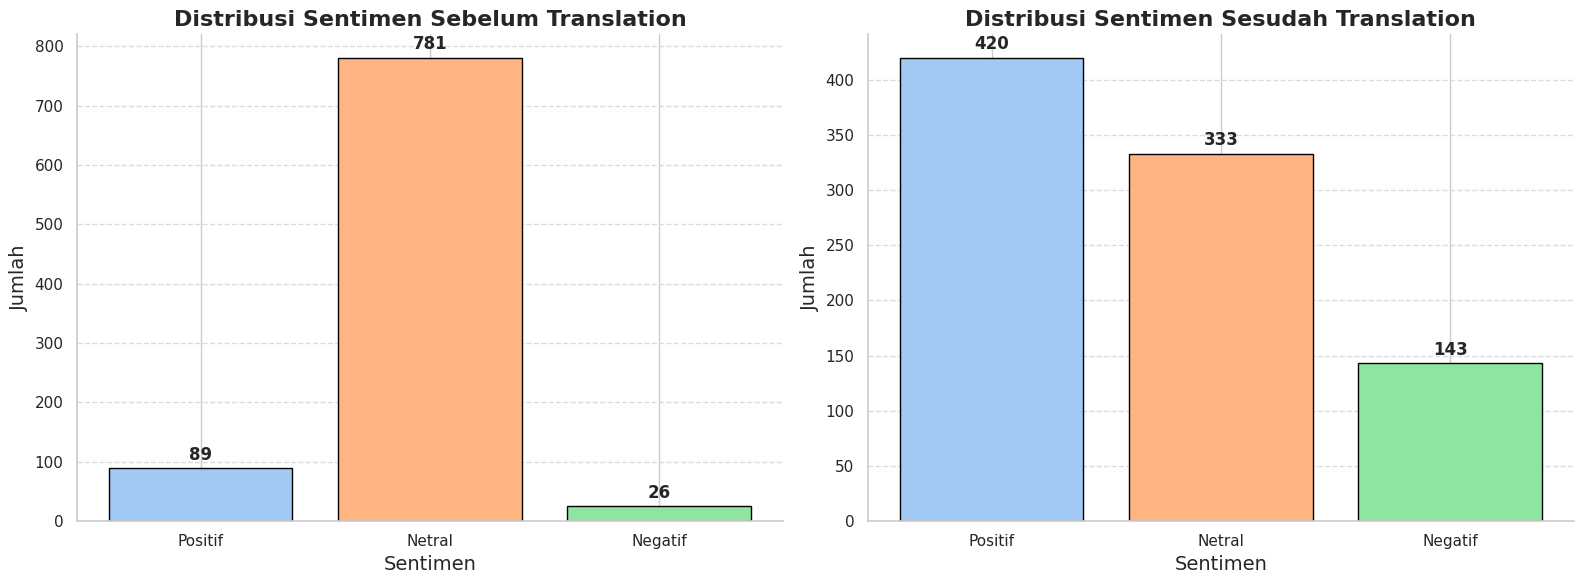

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

# Setting tema visualisasi
sns.set_theme(style="whitegrid")

# Label dan count untuk sebelum translasi
labels = ['Positif', 'Netral', 'Negatif']
counts_before = [total_positif_before, total_netral_before, total_negatif_before]

# Label dan count untuk sesudah translasi
counts_after = [total_positif_after, total_netral_after, total_negatif_after]

# Warna yang sesuai dengan makna sentimen
colors = sns.color_palette("pastel")[0:3]  # Menggunakan palet pastel dari Seaborn

# Membuat subplots dengan dua sumbu
fig, ax = plt.subplots(1, 2, figsize=(16, 6), tight_layout=True)

# Bar chart untuk sebelum translasi
bars_before = ax[0].bar(labels, counts_before, color=colors, edgecolor='black')
ax[0].set_title('Distribusi Sentimen Sebelum Translation', fontsize=16, weight='bold')
ax[0].set_xlabel('Sentimen', fontsize=14)
ax[0].set_ylabel('Jumlah', fontsize=14)

# Menambahkan anotasi untuk bar chart sebelum translasi
for bar, count in zip(bars_before, counts_before):
    height = bar.get_height()
    ax[0].annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3), textcoords="offset points",
                   ha='center', va='bottom', fontsize=12, weight='bold')

# Bar chart untuk sesudah translasi
bars_after = ax[1].bar(labels, counts_after, color=colors, edgecolor='black')
ax[1].set_title('Distribusi Sentimen Sesudah Translation', fontsize=16, weight='bold')
ax[1].set_xlabel('Sentimen', fontsize=14)
ax[1].set_ylabel('Jumlah', fontsize=14)

# Menambahkan anotasi untuk bar chart sesudah translasi
for bar, count in zip(bars_after, counts_after):
    height = bar.get_height()
    ax[1].annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3), textcoords="offset points",
                   ha='center', va='bottom', fontsize=12, weight='bold')

# Menambahkan grid ke kedua subplots
for a in ax:
    a.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan garis batas pada sumbu x dan y
for a in ax:
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.spines['left'].set_linewidth(1.2)
    a.spines['bottom'].set_linewidth(1.2)

# Menampilkan visualisasi
plt.show()


Gambar tersebut menampilkan dua diagram batang yang membandingkan distribusi sentimen sebelum dan sesudah terjemahan. Berikut penjelasan masing-masing diagram:

Diagram Kiri (Distribusi Sentimen Sebelum Translation):

1. Sentimen Positif: Batang berwarna biru menunjukkan jumlah 89.
2. Sentimen Netral: Batang berwarna oranye menunjukkan jumlah tertinggi, yaitu 781.
3. Sentimen Negatif: Batang berwarna hijau menunjukkan jumlah terendah, yaitu 26.

Diagram Kanan (Distribusi Sentimen Sesudah Translation):

1. Sentimen Positif: Batang berwarna biru meningkat menjadi 420.
2. Sentimen Netral: Batang berwarna oranye menurun menjadi 333.
3. Sentimen Negatif: Batang berwarna hijau meningkat menjadi 143.

*Ringkasan:*:

Distribusi Sentimen Sesudah Translation terjadi pergeseran distribusi sentimen dengan peningkatan pada sentimen positif dan negatif serta penurunan pada sentimen netral.

In [220]:
data["klasifikasi"] = status_after
data

,text,text_english,klasifikasi
0,obrolon orang intelektual gibran mana kek gin,What's Gibran's intellectual person talking ab...,Positif
1,konten aku jatuh cinta sama musik dengar tingg...,content i fell in love with music listen to li...,Positif
2,stand with anies baswedan,stand with anies baswedan,Netral
3,omong omong fun factnya lho kerabat anies basw...,"By the way, it's fun, you know, Anies Baswedan...",Positif
4,umur baru tahun lihat video bagi ini edukasi b...,"New years old, watch this video for good educa...",Positif
...,...,...,...
891,menit pertama buat kata tolol,first minute for stupid words,Negatif
892,episode quotharusnya judul partai kosong quot ...,episode quotshould be empty party titlequot ah...,Negatif
893,bang pandji lu salah ngundang episode sama sek...,"Bro Pandji, you made the mistake of inviting t...",Positif
894,halo mas okibrsaya kepala desa buat panitia ad...,"Hello, Mr. Okib, I'm the village head, for the...",Negatif


In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          896 non-null    object
 1   text_english  896 non-null    object
 2   klasifikasi   896 non-null    object
dtypes: object(3)
memory usage: 21.1+ KB


In [222]:
# Mengubah kolom 'text' menjadi string
data['text'] = data['text'].astype(str)

# Mengubah kolom 'klasifikasi' menjadi string
data['klasifikasi'] = data['klasifikasi'].astype(str)


In [223]:
# Mapping the text labels to numbers
mapping = {'Positif': 1, 'Netral': 0, 'Negatif': -1}

data['klasifikasi'] = data['klasifikasi'].map(mapping)

# Display the updated dataframe
print(data)

                                                  text  \
0        obrolon orang intelektual gibran mana kek gin   
1    konten aku jatuh cinta sama musik dengar tingg...   
2                            stand with anies baswedan   
3    omong omong fun factnya lho kerabat anies basw...   
4    umur baru tahun lihat video bagi ini edukasi b...   
..                                                 ...   
891                      menit pertama buat kata tolol   
892  episode quotharusnya judul partai kosong quot ...   
893  bang pandji lu salah ngundang episode sama sek...   
894  halo mas okibrsaya kepala desa buat panitia ad...   
895                                  jawab tidak jawab   

                                          text_english  klasifikasi  
0    What's Gibran's intellectual person talking ab...            1  
1    content i fell in love with music listen to li...            1  
2                            stand with anies baswedan            0  
3    By the way, it's f

## E. Menghitung Kata Dengan TF-IDF

In [224]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [225]:
komen = data['text']

In [226]:
komen.isnull().sum()

0

In [227]:
cv = CountVectorizer()
term_fit = cv.fit(komen)
print(len(term_fit.vocabulary_))

3242


In [228]:
term_fit.vocabulary_

{'obrolon': 2096,
 'orang': 2131,
 'intelektual': 1212,
 'gibran': 980,
 'mana': 1725,
 'kek': 1407,
 'gin': 992,
 'konten': 1516,
 'aku': 65,
 'jatuh': 1262,
 'cinta': 579,
 'sama': 2628,
 'musik': 1918,
 'dengar': 680,
 'tinggal': 3006,
 'agam': 33,
 'asa': 168,
 'stand': 2832,
 'with': 3184,
 'anies': 126,
 'baswedan': 289,
 'omong': 2110,
 'fun': 918,
 'factnya': 879,
 'lho': 1641,
 'kerabat': 1436,
 'jago': 1245,
 'catur': 553,
 'nama': 1940,
 'abubakar': 12,
 'jadi': 1242,
 'abdurrahman': 5,
 'ar': 156,
 'kakek': 1351,
 'pahlawan': 2158,
 'nasional': 1955,
 'ada': 17,
 'juga': 1317,
 'jawara': 1269,
 'surabaya': 2865,
 'bahkan': 238,
 'beliau': 318,
 'sempat': 2709,
 'ikut': 1166,
 'olimpiade': 2107,
 'leipzig': 1627,
 'umur': 3096,
 'baru': 283,
 'tahun': 2887,
 'lihat': 1647,
 'video': 3133,
 'bagi': 225,
 'ini': 1199,
 'edukasi': 825,
 'baik': 239,
 'buka': 503,
 'tahu': 2886,
 'anak': 105,
 'muda': 1896,
 'melek': 1788,
 'politik': 2362,
 'hso': 1137,
 'please': 2336,
 'asam'

In [229]:
# Ambil kolom 'text' dari DataFrame
text = data['text']

# Transformasikan menggunakan term_fit
term_frequency_all = term_fit.transform(text)

# Tampilkan hasilnya
print(term_frequency_all)


  (0, 980)	1
  (0, 992)	1
  (0, 1212)	1
  (0, 1407)	1
  (0, 1725)	1
  (0, 2096)	1
  (0, 2131)	1
  (1, 33)	1
  (1, 65)	1
  (1, 168)	1
  (1, 579)	1
  (1, 680)	1
  (1, 1262)	1
  (1, 1516)	1
  (1, 1918)	1
  (1, 2628)	1
  (1, 3006)	1
  (2, 126)	1
  (2, 289)	1
  (2, 2832)	1
  (2, 3184)	1
  (3, 5)	1
  (3, 12)	2
  (3, 17)	1
  (3, 126)	2
  :	:
  (894, 931)	1
  (894, 932)	1
  (894, 1061)	1
  (894, 1172)	1
  (894, 1173)	1
  (894, 1242)	1
  (894, 1265)	1
  (894, 1370)	1
  (894, 1434)	1
  (894, 1747)	1
  (894, 1806)	1
  (894, 1825)	1
  (894, 1846)	1
  (894, 1935)	1
  (894, 2105)	1
  (894, 2131)	3
  (894, 2191)	1
  (894, 2192)	1
  (894, 2276)	2
  (894, 2806)	1
  (894, 2871)	1
  (894, 3103)	1
  (894, 3221)	2
  (895, 1265)	2
  (895, 2995)	1


In [230]:
# Kolom pertama ini berarti jumlah dokumen
# Kolom kedua berarti letak kata nya
# Kolom ketiga berarti hasil dari tf

term_frequency_all = term_fit.transform(text)
print(term_frequency_all)

  (0, 980)	1
  (0, 992)	1
  (0, 1212)	1
  (0, 1407)	1
  (0, 1725)	1
  (0, 2096)	1
  (0, 2131)	1
  (1, 33)	1
  (1, 65)	1
  (1, 168)	1
  (1, 579)	1
  (1, 680)	1
  (1, 1262)	1
  (1, 1516)	1
  (1, 1918)	1
  (1, 2628)	1
  (1, 3006)	1
  (2, 126)	1
  (2, 289)	1
  (2, 2832)	1
  (2, 3184)	1
  (3, 5)	1
  (3, 12)	2
  (3, 17)	1
  (3, 126)	2
  :	:
  (894, 931)	1
  (894, 932)	1
  (894, 1061)	1
  (894, 1172)	1
  (894, 1173)	1
  (894, 1242)	1
  (894, 1265)	1
  (894, 1370)	1
  (894, 1434)	1
  (894, 1747)	1
  (894, 1806)	1
  (894, 1825)	1
  (894, 1846)	1
  (894, 1935)	1
  (894, 2105)	1
  (894, 2131)	3
  (894, 2191)	1
  (894, 2192)	1
  (894, 2276)	2
  (894, 2806)	1
  (894, 2871)	1
  (894, 3103)	1
  (894, 3221)	2
  (895, 1265)	2
  (895, 2995)	1


In [231]:
komen_tf = komen[1]
print(komen_tf)

konten aku jatuh cinta sama musik dengar tinggal agam asa


In [232]:
term_frequency = term_fit.transform([komen_tf])
print(term_frequency)

  (0, 33)	1
  (0, 65)	1
  (0, 168)	1
  (0, 579)	1
  (0, 680)	1
  (0, 1262)	1
  (0, 1516)	1
  (0, 1918)	1
  (0, 2628)	1
  (0, 3006)	1


In [233]:
dokumen = term_fit.transform(komen)
tfidf_transformer = TfidfTransformer().fit(dokumen)
print(tfidf_transformer.idf_)

tfidf = tfidf_transformer.transform(term_frequency)
print(tfidf)

[6.70044357 5.85314571 6.70044357 ... 6.70044357 7.10590868 7.10590868]
  (0, 3006)	0.30449120897669374
  (0, 2628)	0.18678475613431325
  (0, 1918)	0.37829241695517174
  (0, 1516)	0.27469932471908315
  (0, 1262)	0.34139181296593274
  (0, 680)	0.29261186783424503
  (0, 579)	0.34139181296593274
  (0, 168)	0.34139181296593274
  (0, 65)	0.27469932471908315
  (0, 33)	0.37829241695517174


## F. Visualisasi (NLP)

In [234]:
from wordcloud import WordCloud

In [235]:
print(data['klasifikasi'].unique())


[ 1  0 -1]


In [236]:
train_s0 = data[data["klasifikasi"] == -1]

In [237]:
train_s0.head()

,text,text_english,klasifikasi
5,hso please asam sulfat bunuh ibu janin buah ta...,hso please sulfuric acid kills mother fetus fr...,-1
15,kurang wasit host khusus catur jadi last move ...,There's not enough host referees who specializ...,-1
16,gue kalo situ puyeng banget aslibrmana mikirin...,"I'm really confused when I'm there, how can I ...",-1
37,saran bang pandji tampil catur jgn atas pake k...,"Pandji's advice for playing chess, don't just ...",-1
41,yuk yuk jangan becanda milih calon presiden ud...,"Come on, come on, don't be a joke. Voting for ...",-1


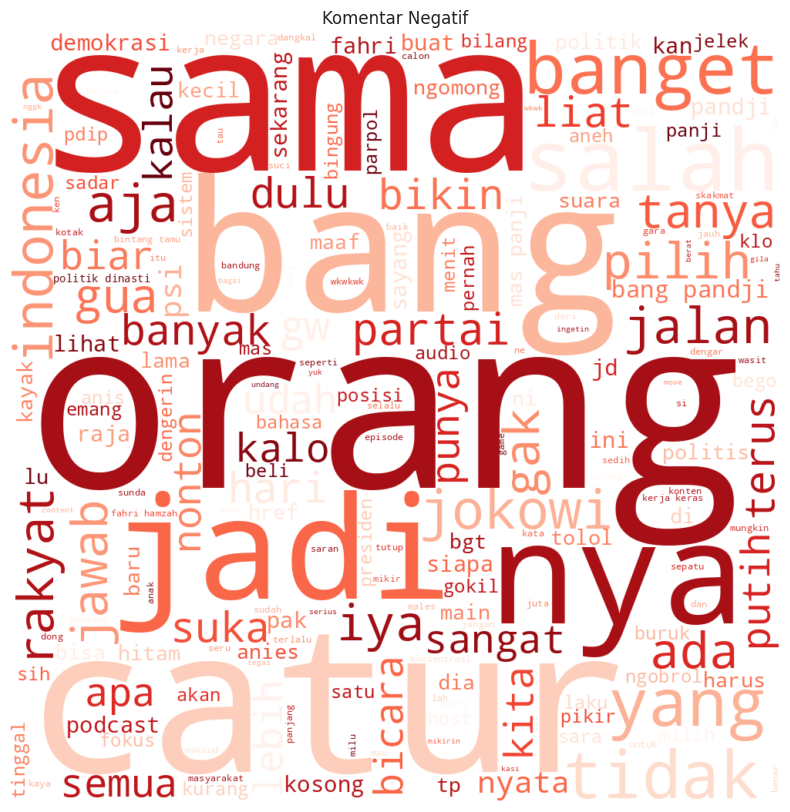

In [238]:
from wordcloud import WordCloud, STOPWORDS

all_text_s0 = ' '.join(word for word in train_s0["text"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Komentar Negatif")
plt.margins(x=0, y=0)
plt.show()

In [239]:
train_s1 = data[data["klasifikasi"] == 1]

In [240]:
train_s1["text"] = train_s1["text"].fillna("Tidak ada komentar")

<ipython-input-240-2ffb92e72650>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_s1["text"] = train_s1["text"].fillna("Tidak ada komentar")


In [241]:
train_s1.head()

,text,text_english,klasifikasi
0,obrolon orang intelektual gibran mana kek gin,What's Gibran's intellectual person talking ab...,1
1,konten aku jatuh cinta sama musik dengar tingg...,content i fell in love with music listen to li...,1
3,omong omong fun factnya lho kerabat anies basw...,"By the way, it's fun, you know, Anies Baswedan...",1
4,umur baru tahun lihat video bagi ini edukasi b...,"New years old, watch this video for good educa...",1
6,jam minum amp tetap fokus topik main bagus job,drink time amp stay focused topic play good job,1


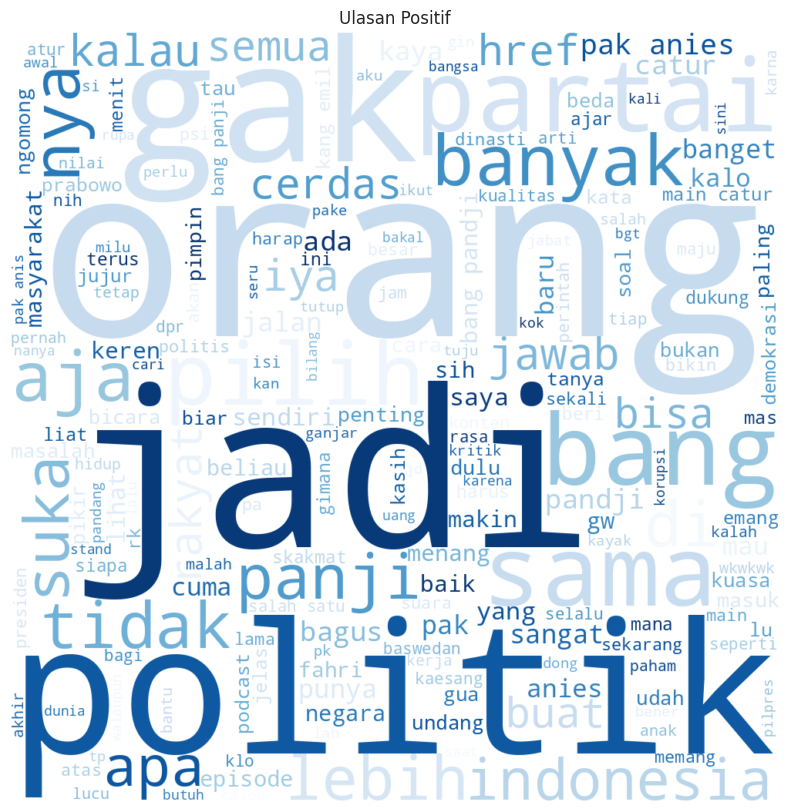

In [242]:
all_text_s1 = ' '.join(word for word in train_s1["text"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s1)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

## G. Machine Learning

###G1.Naive Bayes Classifier

In [248]:
import pandas as pd
from textblob.classifiers import NaiveBayesClassifier
from sklearn.model_selection import train_test_split
from textblob import TextBlob

# Mengonversi kolom teks dan sentimen ke dalam format yang sesuai untuk NaiveBayesClassifier
train_data = list(zip(data['text_english'], data['klasifikasi']))

# Membagi data menjadi data latih dan data uji
train_data, test_data = train_test_split(train_data, test_size=0.3, random_state=42)

In [249]:
import nltk

nltk.download('punkt')

# Membuat dan melatih model NaiveBayesClassifier
classifier = NaiveBayesClassifier(train_data)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [250]:
from sklearn.metrics import classification_report

# Menyiapkan data uji
test_texts = [text for text, _ in test_data]
test_labels = [label for _, label in test_data]

# Prediksi pada data uji
predictions = [classifier.classify(text) for text in test_texts]

# Menghitung akurasi dan membuat laporan klasifikasi
print(f"Accuracy: {sum(p == l for p, l in zip(predictions, test_labels)) / len(test_labels)}")
print(classification_report(test_labels, predictions, target_names=['Negatif', 'Netral', 'Positif']))

Accuracy: 0.5799256505576208
              precision    recall  f1-score   support

     Negatif       0.67      0.04      0.08        47
      Netral       0.54      0.85      0.66       104
     Positif       0.64      0.56      0.60       118

    accuracy                           0.58       269
   macro avg       0.62      0.48      0.45       269
weighted avg       0.61      0.58      0.53       269



### G2. Confusion Matrix

In [265]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, auc # Use RocCurveDisplay instead of plot_roc_curve
from sklearn.preprocessing import label_binarize

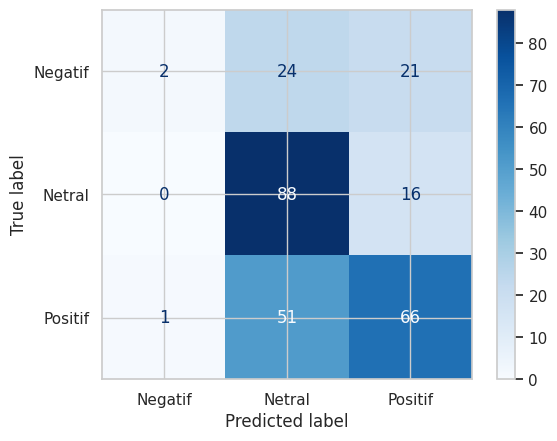

In [266]:
cm = confusion_matrix(test_labels, predictions, labels=[-1, 0, 1])  # Use actual labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negatif', 'Netral', 'Positif'])  # Map to desired display labels
disp.plot(cmap='Blues')